# Euclid Domain for Path and Container

In [1]:
import matplotlib.pyplot as plt

from datasets.primitive.euclid_dataset.euclid_scenes import save_euclid_dataset, load_euclid_dataset, EuclidDatasetUnwrapped
root = "/Users/sunyiqi/Documents/Datasets/euclid/"
train_euclid_dataset = load_euclid_dataset(root + "train", length = 16384 // 2)
#train_euclid_dataset = load_euclid_dataset(root + "test", length = 128)
test_euclid_dataset = load_euclid_dataset(root + "test", length = 64)
print(len(train_euclid_dataset))

"""    objects:
      name: "objects_executor"
      path: 'domains.scene.objects_domain'
"""

display = 0
if display:
    plt.figure(figsize=(7, 4))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(train_euclid_dataset[i]['image'].numpy())
        plt.title(train_euclid_dataset[i]['query'] + ': ' + str(train_euclid_dataset[i]['answer']))

    plt.tight_layout()
    plt.show()

Loading images: 100%|██████████| 256/256 [00:00<00:00, 4664.63it/s]

8192


In [ ]:
from core.learn import AutoLearnSchedule
from helchriss.logger import set_logger_output_file

from core.model import MetaLearner
learner = MetaLearner([])

learner.cheat = 1
learner.load_ckpt("outputs/checkpoints/prototype")
#learner.load_ckpt("outputs/checkpoints/logic") 
#learner.load_ckpt("outputs/checkpoints/euclid")

#print(learner.executor.parser._entries)
#learner.executor.parser.supress = 1
#print(learner.executor.parser.parse("filter(objects(),green())"))

schedule = AutoLearnSchedule(train_euclid_dataset, test_euclid_dataset)


from helchriss.utils.tensor import freeze
#freeze(learner.executor.base_executor.extended_registry, False)
learner.executor.extended_non_effective(True)

learner.executor.verbose = 0
learner.executor.cut = 2
schedule.procedual_train(learner, lr =2e-4, step_epochs=90)
learner.save_ckpt("outputs/checkpoints/euclid0")


08 19:39:40 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
08 19:39:40 WRN `SearchExecutor` The input domain is empty, creating an empty domain
08 19:39:40 Function color automatically registered.
08 19:39:40 Function red automatically registered.
08 19:39:40 Function green automatically registered.
08 19:39:40 Function blue automatically registered.
08 19:39:40 Function objects automatically registered.
08 19:39:40 Function line automatically registered.
08 19:39:40 Function circle automatically registered.
08 19:39:40 Function start automatically registered.
08 19:39:40 Function end automatically registered.
08 19:39:40 Function on_line automatically registered.
08 19:39:40 Function length automatically registered.
08 19:39:40 Function intersect automatically registered.
08 19:39:40 Function parallel automatically registered.
08 19:39:40 Function perpendicular automatically registered.
08 19:39:40 Function connect_segment automatically registered.
08 19:39:40

color:Color [Emb[object, 96]] -> color:Color [Emb[object, 96]] 0.9999990000010001
color:Color [Emb[object, 96]] -> color:Color [Emb[color_wheel, 1]] 0.9999990000010001
cw_map:Objects [Emb[object, 96]] -> color:Color [Emb[object, 96]] 0.0
cw_map:Objects [Emb[object, 96]] -> color:Color [Emb[color_wheel, 1]] 0.0


In [ ]:
learner.save_ckpt("outputs/checkpoints/euclid0")

# avg_loss=1.2407, avg_acc=0.7500, test_acc=0.7656
# avg_loss=1.2949, avg_acc=0.7500, test_acc=0.7344]
# avg_loss=1.3701, avg_acc=0.7344, test_acc=0.7500
# avg_loss=1.2353, avg_acc=0.7344, test_acc=0.7500
# Training epochs:  27%|██▋       | 4/15 [07:40<21:13, 115.76s/epoch, avg_loss=0.5273, avg_acc=0.9291

0

08 19:38:56 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
08 19:38:56 WRN `SearchExecutor` The input domain is empty, creating an empty domain
08 19:38:56 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
08 19:38:56 WRN `SearchExecutor` The input domain is empty, creating an empty domain


exists green object
True


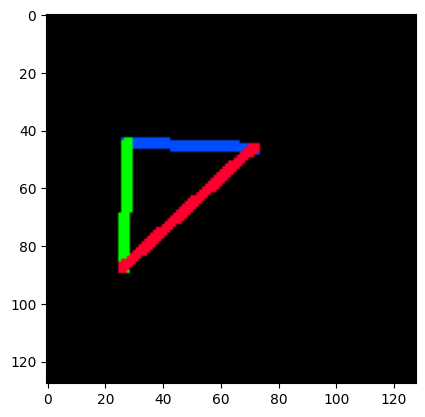

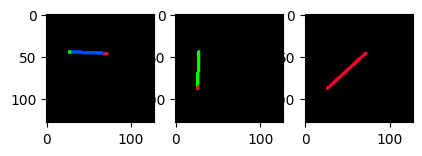

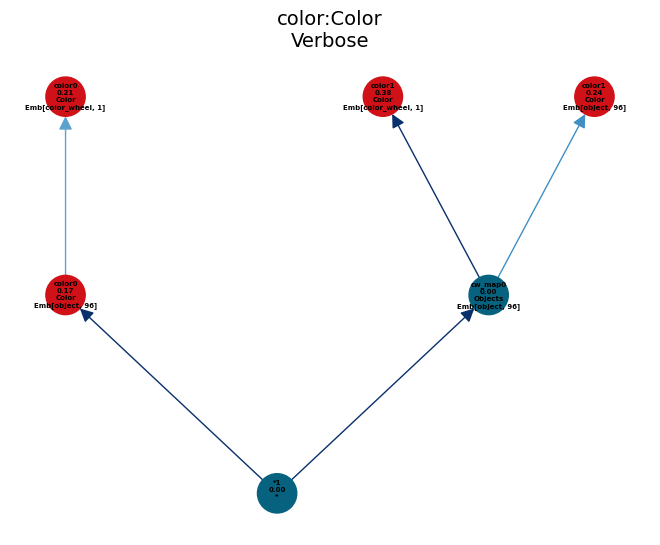

internal loss: tensor(-0., grad_fn=<NegBackward0>)
red filter: tensor([True, True, True])


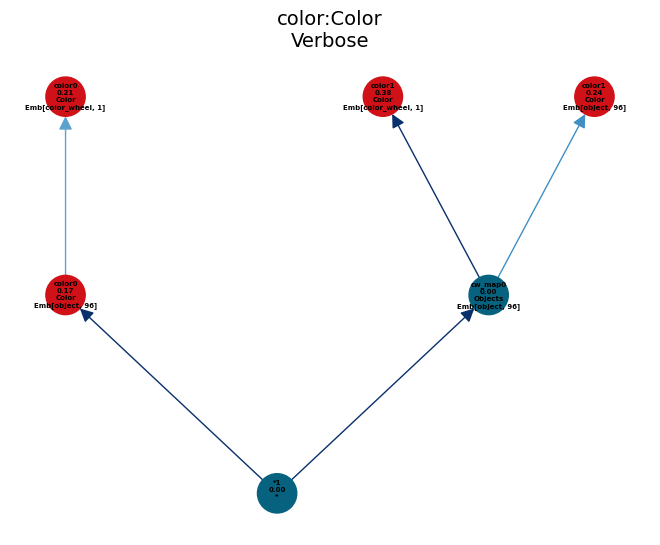

internal loss: tensor(-0., grad_fn=<NegBackward0>)
green filter: tensor([False,  True, False])


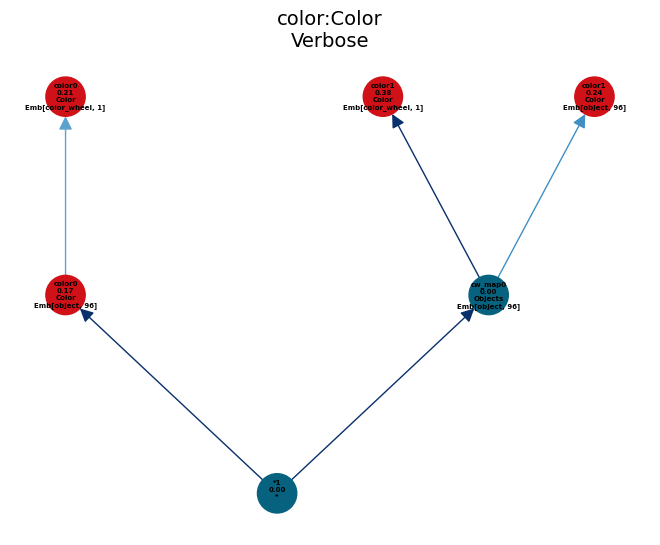

internal loss: tensor(-0., grad_fn=<NegBackward0>)
blue filter: tensor([False, False,  True])


In [ ]:
from core.model import MetaLearner
learner = MetaLearner([])

learner.load_ckpt("outputs/checkpoints/euclid0")

learner.cheat = 1
learner.executor.verbose = 1
learner.executor.cut = 2
learner.executor.extended_non_effective(True)


idx = 2
grounding = train_euclid_dataset[idx]["grounding"]
img = grounding["image"]
segments = grounding["segment"]
print(train_euclid_dataset[idx]["query"])
print(train_euclid_dataset[idx]["answer"])


#program = "filter(objects(), blue)"
#program = "exists(filter(objects(), circle))"
plt.figure("Euclid Grounding Scene")
plt.imshow(img)
plt.figure("Segment Objects")
w,h,n = segments.shape
a = n // 4
for i in range(n):
    plt.subplot(a + 1,4,i + 1)

    plt.imshow(segments[:,:,i][...,None] * img)
plt.show()


for tag in ["red", "green", "blue", ]:
    program = f"filter(objects(), 'lambda x => {tag}(color(x))')"

    measure, loss = learner.executor.evaluate(program, grounding)
    #print(measure)
    print(f"{tag} filter:",measure.value[:,0] > 0)

for tag in ["line", "circle"]:
    pass



tensor(0.0021)
tensor(0.0021)
tensor(0.0021)
tensor(0.3179)
tensor(0.3179)
tensor(0.3179)
tensor(0.0004)
tensor(0.0004)
tensor(0.0004)
tensor(0.0021)
tensor(0.3179)
tensor(0.0004)
tensor(0.0021)
tensor(0.3179)
tensor(0.0004)
tensor(0.0021)
tensor(0.3179)
tensor(0.0004)


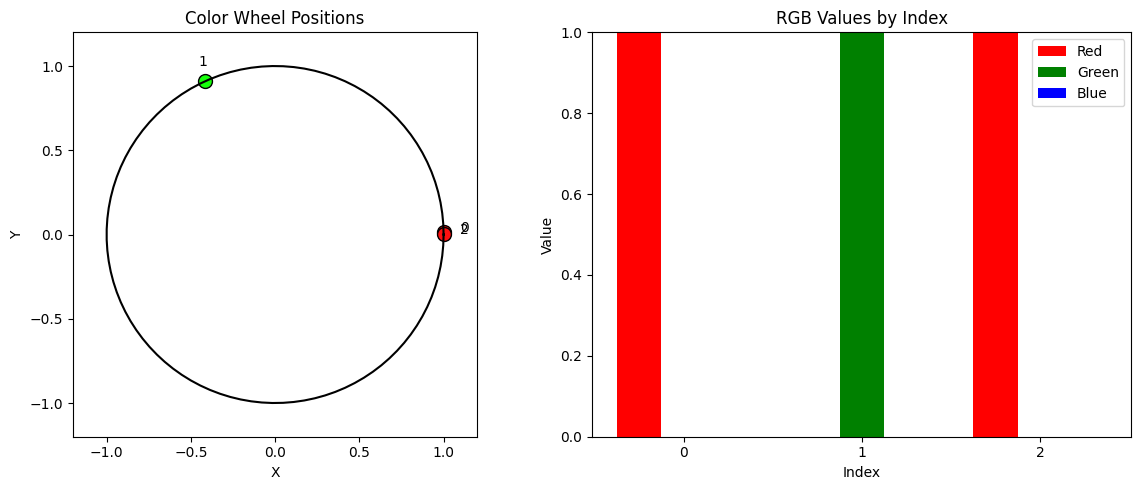

In [ ]:
from domains.visual.color_domain import color_executor
if __name__ == "__main__":
    import torch
    colors = torch.tensor([
        0.0021,
        0.3179,
        0.0004,
    ])
    color_executor.visualize(colors)

In [ ]:
from datasets.primitive.euclid_dataset import *
from datasets.primitive.euclid_dataset.euclid_scenes import save_euclid_dataset, load_euclid_dataset, EuclidDatasetUnwrapped
#train_euclid_dataset = EuclidDatasetUnwrapped(2048 * 8)
#test_euclid_dataset = EuclidDatasetUnwrapped(256)

root = "/Users/sunyiqi/Documents/Datasets/euclid/"
#save_euclid_dataset(train_euclid_dataset,root + "train")
#save_euclid_dataset(test_euclid_dataset, root + "test")

#load_euclid_dataset(root + "train")
#load_euclid_dataset(root + "test")


Scene Metadata: {'num_objects': 2, 'mask_info': {'background_value': 0, 'object_channel_mapping': {'c1': 0, 'c2': 1}, 'mask_shape': torch.Size([128, 128, 2])}, 'canvas_size': 128, 'objects': [{'name': 'c1', 'type': 'circle', 'geometry': tensor([24.2477, 24.2474, 24.2732]), 'color_name': 'red', 'color_rgb': tensor([1.0000, 0.0000, 0.2766])}, {'name': 'c2', 'type': 'circle', 'geometry': tensor([24.2468, 24.2465, 24.2721]), 'color_name': 'blue', 'color_rgb': tensor([0.0486, 0.2043, 1.0000])}]}

Meta [{'name': 'c1', 'type': 'circle', 'geometry': tensor([24.2477, 24.2474, 24.2732]), 'color_name': 'red', 'color_rgb': tensor([1.0000, 0.0000, 0.2766])}, {'name': 'c2', 'type': 'circle', 'geometry': tensor([24.2468, 24.2465, 24.2721]), 'color_name': 'blue', 'color_rgb': tensor([0.0486, 0.2043, 1.0000])}]
torch.Size([3, 128, 128]) torch.Size([128, 128, 2])


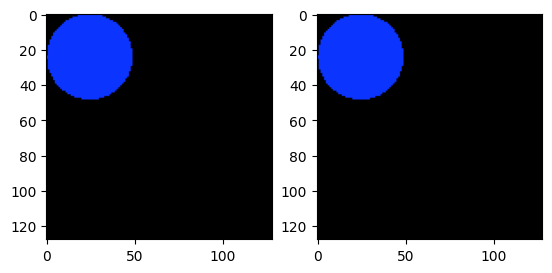

In [ ]:

def colored_triangle(colors = ["red", "green", "blue"]):
    program = f"l1:line(p1, p2)[color({colors[0]})];l2:line(p2, p3)[color({colors[1]})];l3:line(p3, p1)[color({colors[2]})];"
    return program

def colored_right_triangle(colors = ["red", "green", "blue"]):
    program = f"""
    l1:line(p1, p2)[color({colors[0]})];
    l2:line(p2, p3)[perpendicular(l1,l2),perpendicular(l2,l1),color({colors[1]})];
    l3:line(p3, p1)[color({colors[2]})];
    """
    return program

def colored_equilateral_triangle(colors=["red", "green", "blue"]):
    program = f"""
l1:line(p1, p2)[color({colors[0]})];
l2:line(p2, p3)[color({colors[1]}), length(l2, length(l1))];
l3:line(p3, p1)[color({colors[2]}), length(l3, length(l1))];
"""
    return program.strip()

def colored_square(colors=["red", "green", "blue", "red"]):
    program = f"""
l1:line(p1, p2)[color({colors[0]})];
l2:line(p2, p3)[color({colors[1]}), perpendicular(l2, l1)];
l3:line(p3, p4)[color({colors[2]}), perpendicular(l3, l2), parallel(l3, l1)];
l4:line(p4, p1)[color({colors[3]}), perpendicular(l4, l3), parallel(l4, l2)];
"""
    return program.strip()

def tangent_line_and_circle(line_color="red", circle_color="blue"):
    dsl_program = f"""
c1:circle(p1, p2)[color({circle_color})];

l1:line(p3, p4)[color({line_color}), tangent(l1, c1)];
"""
    return dsl_program.strip()

def two_circle_line_connect():
    circle_color1 = "red"
    circle_color2 = "green"
    line_color    = "blue"
    program = f"""
    c1:circle(p1,p2)[color({circle_color1}),!overlap(c2,c1)];
    c2:circle(p3,p4)[color({circle_color2}), !overlap(c1,c2)];
    l1:line(p1,p3)[color({line_color})];

    """
    #l2:line(p1,p6)[color(yellow), perpendicular(l1,l2)]

    return program

def custom2():
    line_color = "blue"
    program = f"""
    l1:line(p1,p2)[color({line_color})];
    l2:line(p2,p3)[color({line_color}), perpendicular(l1,l2),perpendicular(l2,l1)];
    l3:line(p3,p4)[color({line_color}), perpendicular(l2,l3),perpendicular(l3,l2)];
    """

    return program

def cross_line_angle(line1_color="red", line2_color="green"):
    program = f"""
l1:line(p1, p2)[color({line1_color}),];
l2:line(p3, p4)[color({line2_color}),intersect(l2, l1)];
l3:line(p4, p6)[color({line2_color}), perpendicular(l3,l2), perpendicular(l2,l3)];
l4:line(p1, p8)[color(yellow),parallel(l3,l4), parallel(l4,l3)];
"""
    return program.strip()

if __name__ == "__main__":
    from domains.math.euclid_domain import euclid_executor
    from datasets.primitive.euclid_dataset import generate_constrained_scene

    program = """
    c1:circle(p1,p2)[color(red)];
    c2:circle(p3,p4)[color(blue)];
""".replace(" ","")
    
    # triangle program
    #program = colored_triangle()
    #program = colored_right_triangle()
    #program = colored_square()
    #program = colored_equilateral_triangle()
    #program = tangent_line_and_circle()
    #program = two_circle_line_connect()
    #program = custom2()
    #program = cross_line_angle()
    #program = "c1:circle(p1,p1)[color(blue)]"

    # Generate constrained scene
    scene_img, segment, scene_meta = generate_constrained_scene(dsl_program = program)
    
    # Print metadata (DSL program + object specs)
    print(f"\nScene Metadata: {scene_meta}")
    print(f"\nMeta {scene_meta['objects']}")

    print(scene_img.shape, segment.shape)

    import matplotlib.pyplot as plt
    plt.subplot(121)
    plt.imshow(scene_img.permute(1,2,0))
    plt.subplot(122)
    plt.imshow(segment[:,:,0][...,None] * scene_img.permute(1,2,0))

    # Save rendered scene
    #import PIL.Image as Image
    #img_np = (scene_img.permute(1,2,0).cpu().numpy() * 255).astype("uint8")
    #Image.fromarray(img_np).save("constrained_scene_example.png")
    #print("Constrained scene saved as 'constrained_scene_example.png'")